In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
gold_price=pd.read_csv('gld_price_data.csv')
print(gold_price)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [10]:
gold_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
#print last 5 rows
gold_price.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
#no of rows
gold_price.shape

(2290, 6)

In [13]:
#getting basic info
gold_price.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [9]:
#check no of missing values
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
#getting the statistical measures of the data
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [15]:
print(gold_price.dtypes)


Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [16]:
# Select only numeric columns
numeric_gold_price = gold_price.select_dtypes(include=[np.number])

# Calculate the correlation matrix
df = numeric_gold_price.corr()
print(df)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [17]:
correlation=df.corr()

<Axes: >

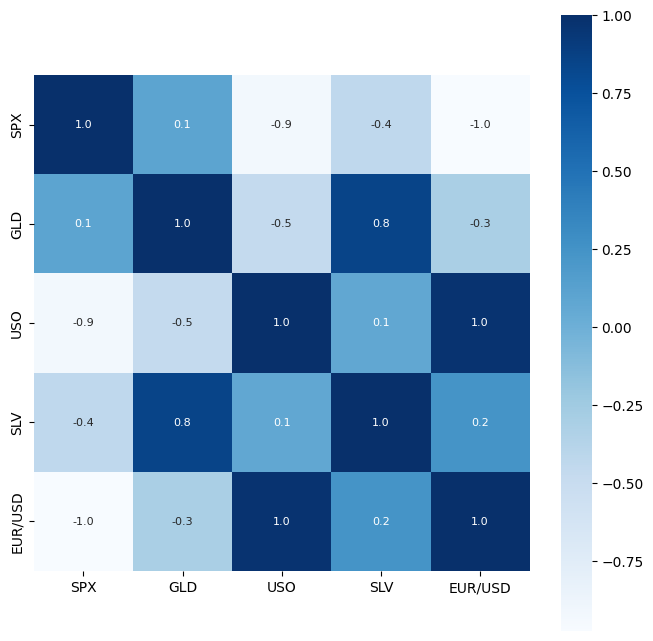

In [23]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [21]:
print(correlation['GLD'])

SPX        0.103801
GLD        1.000000
USO       -0.469427
SLV        0.845839
EUR/USD   -0.306127
Name: GLD, dtype: float64


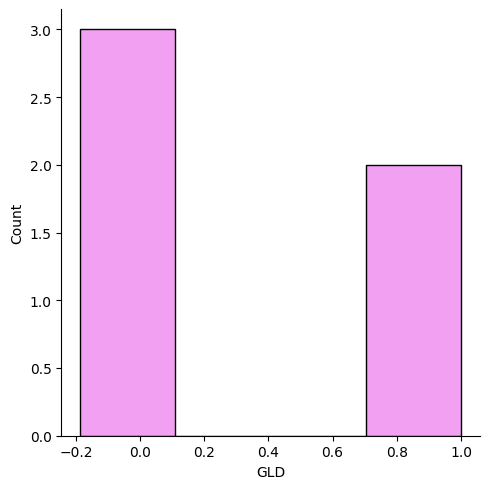

In [25]:
sns.displot(df['GLD'],color='violet')

In [26]:
#spltting features and target
X=gold_price.drop(['Date', 'GLD'],axis=1)
Y=gold_price['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [28]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
regressor= RandomForestRegressor(n_estimators=100)

In [30]:
#train module
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [31]:
#predictions on test data
test_data_predictions= regressor.predict(X_test)
print(test_data_predictions)

[168.58379917  82.08209973 116.02100001 127.68480056 120.59420134
 154.89899713 150.26949927 126.20929993 117.6373986  126.09660064
 116.78780072 172.17930034 140.96369836 167.59549892 115.24499995
 117.10040037 139.25340316 170.14500125 159.0479029  159.22499944
 155.14140025 125.00919976 175.81749975 157.06090258 125.18930048
  93.64599983  78.12359976 120.46289987 119.12769936 167.51459976
  88.17960021 125.3156997   91.15050093 117.74450051 121.01349911
 135.90190038 115.62950112 115.2021007  149.06399898 107.35070084
 104.15530253  87.18379777 126.53620048 117.82999968 153.11079896
 119.55740016 108.25540006 107.97789854  93.18140058 126.92509817
  74.9509005  113.62079889 121.50430014 111.26359941 118.78459895
 120.89129909 159.66860007 167.56390122 146.91829663  85.62629851
  94.24690034  86.71819888  90.52309997 118.84730065 126.43510047
 127.8358001  170.6169004  122.31959931 117.48119874  98.35460027
 168.19400074 142.98869882 132.19770217 121.17220221 121.20659929
 119.86780

In [32]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_predictions)
print("R squared error : ",error_score)

R squared error :  0.9886921286260296


In [34]:
#compare actual values and predicted values
Y_test=list(Y_test)

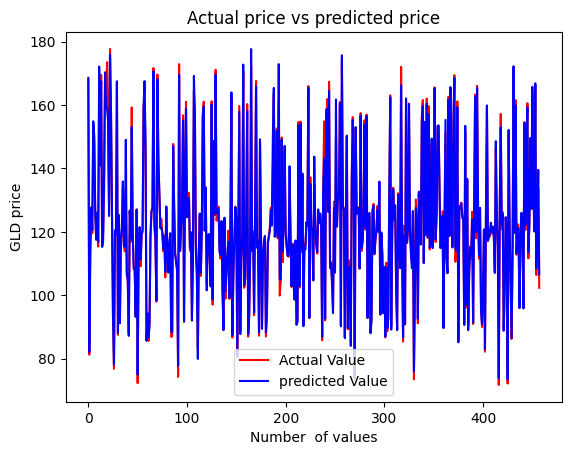

In [38]:
plt.plot(Y_test,color='red',label='Actual Value')
plt.plot(test_data_predictions, color='blue', label='predicted Value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number  of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()